In [9]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

In [10]:
file_path = 'card_transdata.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [11]:
# Find rows with NaN values
rows_with_nan = df[df.isna().any(axis=1)]

# Display rows with NaN values
rows_with_nan

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud


In [12]:
# Drop rows with NaN values
df = df.dropna()

In [13]:
# Splitting the data into features (X) and the target variable (y)
X = df  # Features
y = df['fraud']  # Target variable

# Splitting the data into training and test sets (5% training and 95% test)
X_train, X_test_temp, y_train, y_test_temp = train_test_split(X, y, test_size=0.95, random_state=42, stratify=y)

In [17]:
# Selecting indices where y_test_temp = 0
indices_0 = y_test_temp[y_test_temp == 0].sample(500, random_state=42).index

# Selecting indices where y_test_temp = 1
indices_1 = y_test_temp[y_test_temp == 1].sample(500, random_state=42).index

# Selecting samples based on the indices
X_test_0 = X_test_temp.loc[indices_0]
y_test_0 = y_test_temp.loc[indices_0]

X_test_1 = X_test_temp.loc[indices_1]
y_test_1 = y_test_temp.loc[indices_1]

# Concatenating the selected samples
X_test = pd.concat([X_test_0, X_test_1])
y_test = pd.concat([y_test_0, y_test_1])

# Ensure X_test and y_test are shuffled
X_test, y_test = shuffle(X_test, y_test, random_state=42)

# Exploratory data analysis

In [20]:
summary_stats = X_train.describe()

# Print the summary statistics
summary_stats

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000
mean,26.876561,4.962989,1.821582,0.88302,0.348820,0.099420,0.651300,0.087400
std,65.555451,23.810704,2.713303,0.32140,0.476602,0.299228,0.476564,0.282423
min,0.034267,0.000434,0.010434,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.877324,0.295821,0.474736,1.00000,0.000000,0.000000,0.000000,0.000000
50%,9.889487,0.992857,1.001101,1.00000,0.000000,0.000000,1.000000,0.000000
75%,25.673217,3.324480,2.095408,1.00000,1.000000,0.000000,1.000000,0.000000
max,3716.377730,1975.094256,86.926795,1.00000,1.000000,1.000000,1.000000,1.000000


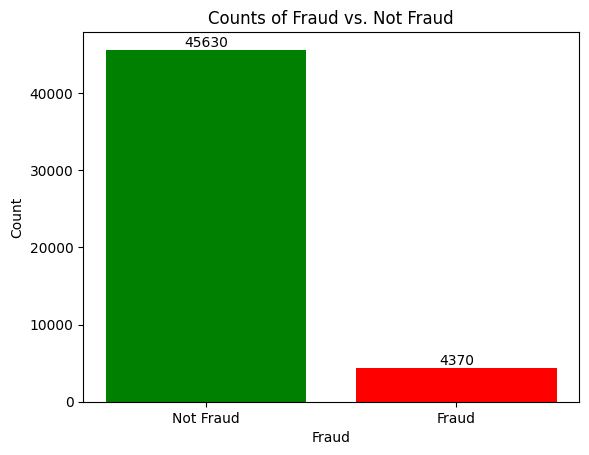

In [7]:
# Count occurrences of fraud vs. not fraud
fraud_counts = X_train['fraud'].value_counts()

# Plot
plt.bar(fraud_counts.index, fraud_counts.values, color=['green', 'red'])
plt.title('Counts of Fraud vs. Not Fraud')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])

# Adding text annotations
for i, count in enumerate(fraud_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

<ipython-input-8-175f5b024584>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_for_plot, x='fraud', y='distance_from_home', palette=['green', 'red'])


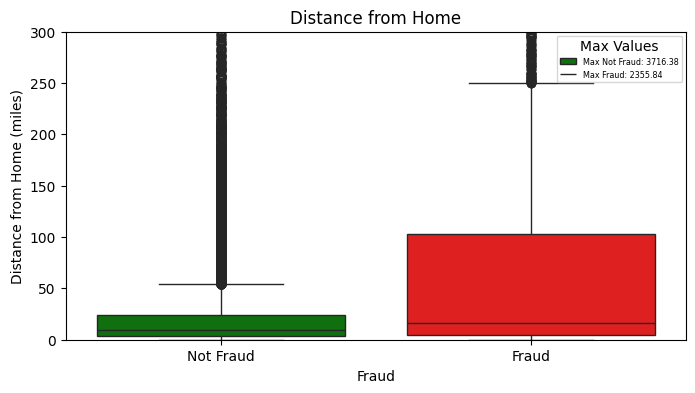

<ipython-input-8-175f5b024584>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_for_plot, x='fraud', y='distance_from_last_transaction', palette=['green', 'red'])


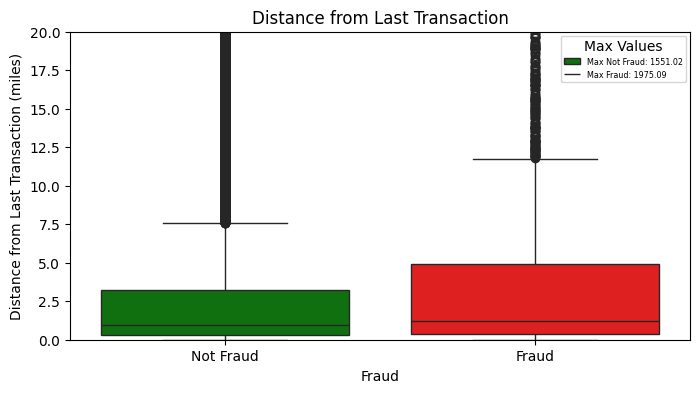

<ipython-input-8-175f5b024584>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_for_plot, x='fraud', y='ratio_to_median_purchase_price', palette=['green', 'red'])


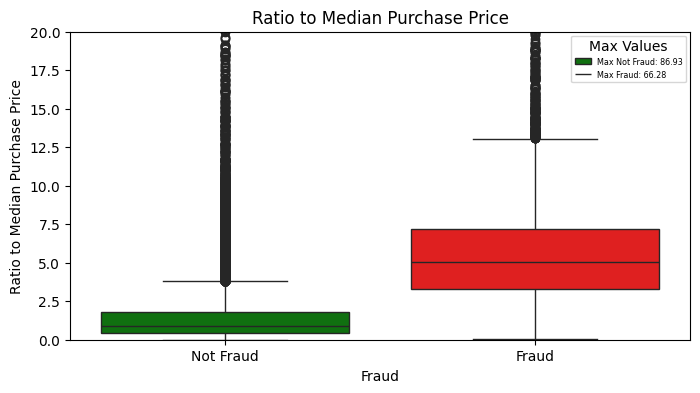

In [8]:
# Select the features and the target variable (fraud)
selected_columns = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'fraud']
data_for_plot = X_train[selected_columns]

# Calculate maximum values
max_values = data_for_plot.groupby('fraud').max()

# Create box plots
plt.figure(figsize=(8, 4))
sns.boxplot(data=data_for_plot, x='fraud', y='distance_from_home', palette=['green', 'red'])
plt.ylim(0, 300)  # Limit y-axis range
plt.title('Distance from Home')
plt.xlabel('Fraud')
plt.ylabel('Distance from Home (miles)')
plt.xticks([0, 1], ['Not Fraud', 'Fraud']) # Change x-axis labels

# Add legend with maximum values and adjust fontsize
plt.legend(title='Max Values', loc='upper right', labels=[f'Max Not Fraud: {max_values.loc[0]["distance_from_home"]:.2f}',
                                                          f'Max Fraud: {max_values.loc[1]["distance_from_home"]:.2f}'],
           fontsize='xx-small')

plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(data=data_for_plot, x='fraud', y='distance_from_last_transaction', palette=['green', 'red'])
plt.ylim(0, 20)  # Limit y-axis range
plt.title('Distance from Last Transaction')
plt.xlabel('Fraud')
plt.ylabel('Distance from Last Transaction (miles)')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])  # Change x-axis labels

# Add legend with maximum values and adjust fontsize
plt.legend(title='Max Values', loc='upper right', labels=[f'Max Not Fraud: {max_values.loc[0]["distance_from_last_transaction"]:.2f}',
                                                          f'Max Fraud: {max_values.loc[1]["distance_from_last_transaction"]:.2f}'],
           fontsize='xx-small')

plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(data=data_for_plot, x='fraud', y='ratio_to_median_purchase_price', palette=['green', 'red'])
plt.ylim(0, 20)  # Limit y-axis range
plt.title('Ratio to Median Purchase Price')
plt.xlabel('Fraud')
plt.ylabel('Ratio to Median Purchase Price')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])  # Change x-axis labels

# Add legend with maximum values and adjust fontsize
plt.legend(title='Max Values', loc='upper right', labels=[f'Max Not Fraud: {max_values.loc[0]["ratio_to_median_purchase_price"]:.2f}',
                                                          f'Max Fraud: {max_values.loc[1]["ratio_to_median_purchase_price"]:.2f}'],
           fontsize='xx-small')

plt.show()

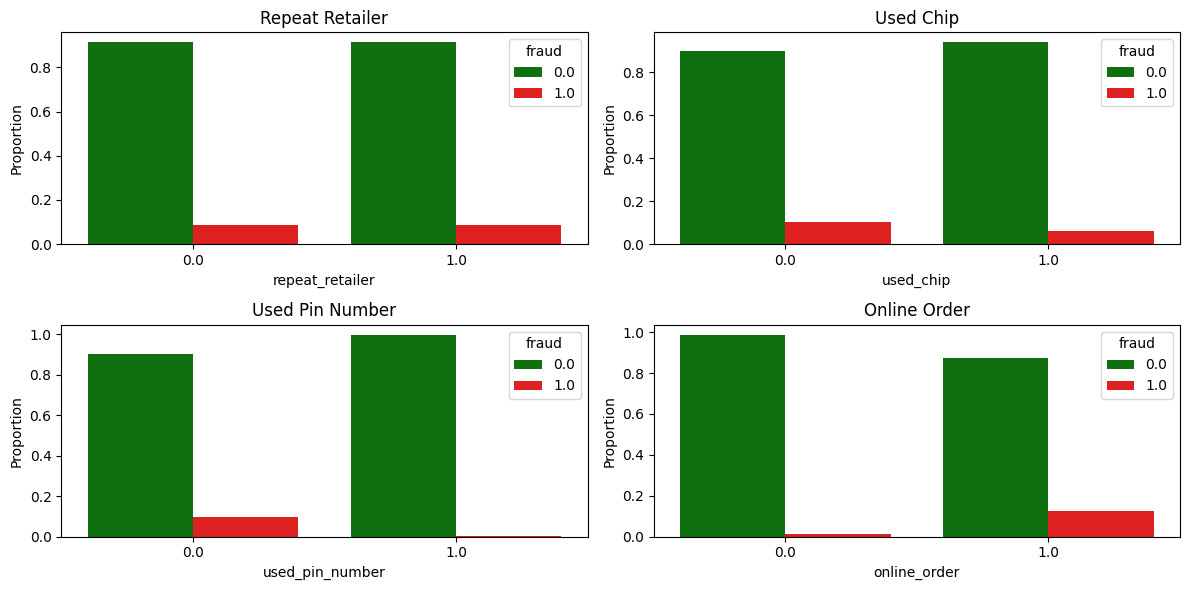

In [9]:
# Selecting the features and the target variable (fraud)
selected_columns = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud']
data_for_plot = X_train[selected_columns]

# Grouping data by the feature and fraud status, then calculating proportions
grouped_data = data_for_plot.groupby(['repeat_retailer', 'fraud']).size().reset_index(name='count')
grouped_data['proportion'] = grouped_data.groupby('repeat_retailer')['count'].transform(lambda x: x / x.sum())

# Plotting parallel bar plots
plt.figure(figsize=(12, 6))

# Repeat Retailer
plt.subplot(2, 2, 1)
sns.barplot(data=grouped_data, x='repeat_retailer', y='proportion', hue='fraud', palette=['green', 'red'])
plt.title('Repeat Retailer')
plt.ylabel('Proportion')

# Used Chip
plt.subplot(2, 2, 2)
grouped_data = data_for_plot.groupby(['used_chip', 'fraud']).size().reset_index(name='count')
grouped_data['proportion'] = grouped_data.groupby('used_chip')['count'].transform(lambda x: x / x.sum())
sns.barplot(data=grouped_data, x='used_chip', y='proportion', hue='fraud', palette=['green', 'red'])
plt.title('Used Chip')
plt.ylabel('Proportion')

# Used Pin Number
plt.subplot(2, 2, 3)
grouped_data = data_for_plot.groupby(['used_pin_number', 'fraud']).size().reset_index(name='count')
grouped_data['proportion'] = grouped_data.groupby('used_pin_number')['count'].transform(lambda x: x / x.sum())
sns.barplot(data=grouped_data, x='used_pin_number', y='proportion', hue='fraud', palette=['green', 'red'])
plt.title('Used Pin Number')
plt.ylabel('Proportion')

# Online Order
plt.subplot(2, 2, 4)
grouped_data = data_for_plot.groupby(['online_order', 'fraud']).size().reset_index(name='count')
grouped_data['proportion'] = grouped_data.groupby('online_order')['count'].transform(lambda x: x / x.sum())
sns.barplot(data=grouped_data, x='online_order', y='proportion', hue='fraud', palette=['green', 'red'])
plt.title('Online Order')
plt.ylabel('Proportion')

plt.tight_layout()
plt.show()

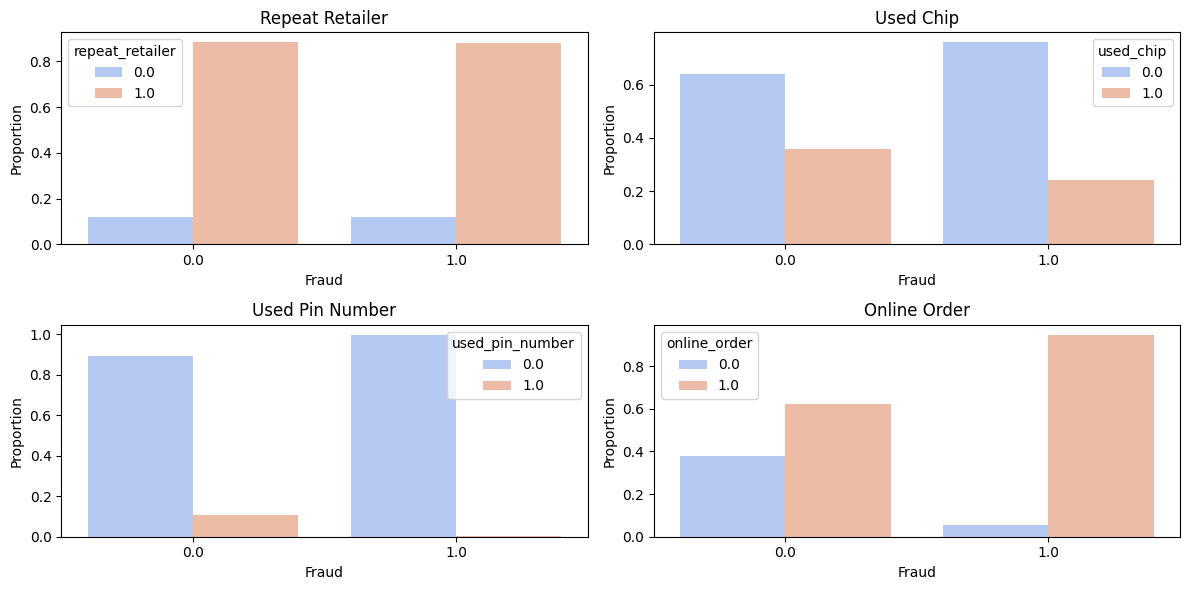

In [10]:
# Selecting the features and the target variable (fraud)
selected_columns = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud']
data_for_plot = X_train[selected_columns]

# Grouping data by the fraud status and feature, then calculating proportions
grouped_data = data_for_plot.groupby(['fraud', 'repeat_retailer']).size().reset_index(name='count')
grouped_data['proportion'] = grouped_data.groupby('fraud')['count'].transform(lambda x: x / x.sum())

# Plotting parallel bar plots
plt.figure(figsize=(12, 6))

# Repeat Retailer
plt.subplot(2, 2, 1)
sns.barplot(data=grouped_data, x='fraud', y='proportion', hue='repeat_retailer', palette='coolwarm')
plt.title('Repeat Retailer')
plt.xlabel('Fraud')
plt.ylabel('Proportion')

# Used Chip
plt.subplot(2, 2, 2)
grouped_data = data_for_plot.groupby(['fraud', 'used_chip']).size().reset_index(name='count')
grouped_data['proportion'] = grouped_data.groupby('fraud')['count'].transform(lambda x: x / x.sum())
sns.barplot(data=grouped_data, x='fraud', y='proportion', hue='used_chip', palette='coolwarm')
plt.title('Used Chip')
plt.xlabel('Fraud')
plt.ylabel('Proportion')

# Used Pin Number
plt.subplot(2, 2, 3)
grouped_data = data_for_plot.groupby(['fraud', 'used_pin_number']).size().reset_index(name='count')
grouped_data['proportion'] = grouped_data.groupby('fraud')['count'].transform(lambda x: x / x.sum())
sns.barplot(data=grouped_data, x='fraud', y='proportion', hue='used_pin_number', palette='coolwarm')
plt.title('Used Pin Number')
plt.xlabel('Fraud')
plt.ylabel('Proportion')

# Online Order
plt.subplot(2, 2, 4)
grouped_data = data_for_plot.groupby(['fraud', 'online_order']).size().reset_index(name='count')
grouped_data['proportion'] = grouped_data.groupby('fraud')['count'].transform(lambda x: x / x.sum())
sns.barplot(data=grouped_data, x='fraud', y='proportion', hue='online_order', palette='coolwarm')
plt.title('Online Order')
plt.xlabel('Fraud')
plt.ylabel('Proportion')

plt.tight_layout()
plt.show()

# Model Training

In [11]:
# Drop labels from the training data
X_train = X_train.drop(columns=['fraud'])
X_test = X_test.drop(columns=['fraud'])

In [12]:
# Initializing classifiers
classifiers = {
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(3, 3), max_iter=500)  # Two dense layers with 3 units each
}

# Training classifiers
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)

# Evaluating classifiers
results = {}
for name, classifier in classifiers.items():
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[name] = {'Accuracy': accuracy, 'F1 Score': f1}

# Printing results
for name, scores in results.items():
    print(f'{name}: Accuracy - {scores["Accuracy"]:.4f}, F1 Score - {scores["F1 Score"]:.4f}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Naive Bayes: Accuracy - 0.7730, F1 Score - 0.7634
K-Nearest Neighbors: Accuracy - 0.8710, F1 Score - 0.8694
Support Vector Machine: Accuracy - 0.5970, F1 Score - 0.5243
Random Forest: Accuracy - 0.9970, F1 Score - 0.9970
Logistic Regression: Accuracy - 0.7870, F1 Score - 0.7777
Neural Network: Accuracy - 0.9180, F1 Score - 0.9175
